In [1]:
# import everything
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier


In [2]:
from sklearn import datasets

df = pd.read_csv('bank.csv')
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [3]:
df = df.drop(columns=['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous' , 'poutcome'])
df.tail()

,age,job,marital,education,default,balance,housing,loan,y
4516,33,services,married,secondary,no,-333,yes,no,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,no
4518,57,technician,married,secondary,no,295,no,no,no
4519,28,blue-collar,married,secondary,no,1137,no,no,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,no


In [4]:
dict = {
    'no': 0,
    'yes': 1
}

dict_edu = {
    'primary': 1,
    'secondary':2,
    'tertiary':3
}

dict_married = {
    'single': 1,
    'married': 2,
    'divorced': 3
}

dict_job = {
    'admin.': 1,
    'unemployed': 0,
    'management': 1,
    'housemaid': 1,
    'entrepreneur':1,
    "student": 0,
    "blue-collar": 1,
    "self-employed": 1,
    "retired": 0,
    "technician":1,
    "services":1
}


df['y'] = df['y'].map(dict)
df['default'] = df['default'].map(dict)
df['housing'] = df['housing'].map(dict)
df['loan'] = df['loan'].map(dict)

df['marital'] = df['marital'].map(dict_married)

df['education'] = df['education'].map(dict_edu)

df['job'] = df['job'].map(dict_job)

#drop NaN columns
df = df.dropna()

df.head()


,age,job,marital,education,default,balance,housing,loan,y
0,30,0.0,2,1.0,0,1787,0,0,0
1,33,1.0,2,2.0,0,4789,1,1,0
2,35,1.0,1,3.0,0,1350,1,0,0
3,30,1.0,2,3.0,0,1476,1,1,0
4,59,1.0,2,2.0,0,0,1,0,0


In [5]:
#binning
train_data=[df]
for dataset in train_data:
    dataset.loc[ dataset['age'] <= 22,'age'] = 0,
    dataset.loc[(dataset['age'] >  22) & (dataset['age'] <= 30),'age'] = 1,
    dataset.loc[(dataset['age'] > 30) & (dataset['age'] <= 40),'age'] = 2,
    dataset.loc[(dataset['age'] > 40 ) & (dataset['age'] <= 50),'age'] = 3,
    dataset.loc[(dataset['age'] > 50 ) & (dataset['age'] <= 60),'age'] = 4,
    dataset.loc[(dataset['age'] > 60 ) & (dataset['age'] <= 70),'age'] = 5,
    dataset.loc[ dataset['age'] > 70,'age'] = 6

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import time

x = df.loc[:, df.columns != 'y']
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)


def decTreeAndAccuracy(crit = 'gini',  maxDepth = None, minSamples = 1, minSplit = 2):
    #generate the decision tree model
    dt = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, min_samples_leaf = minSamples, 
                                 min_samples_split = minSplit, random_state= 42)
    
    start = time.time()
    #train the model with the train data set above
    dt.fit(x_train, y_train)
    end= time.time()
    speed = end - start
    print("time taken", speed)

    #generate y_hat to test the accuracy
    y_hat = dt.predict(x_test) 
    print(y_hat)
    #generate accuracy
    accuracy = accuracy_score(y_test, y_hat)
    print('y_hat:', y_hat)
    print('accuracy:', accuracy)
    return (dt, y_hat, accuracy)

decTreeAndAccuracy()
#accuracy: 0.7940630797773655

decTreeAndAccuracy(maxDepth = 10)
#accuracy: 0.8608534322820037

dt, y_hat, accuracy = decTreeAndAccuracy(maxDepth = 10, crit = 'entropy')
# accuracy: 0.87569573283859




time taken 0.009968757629394531
[0 0 0 ... 0 0 1]
y_hat: [0 0 0 ... 0 0 1]
accuracy: 0.8200371057513914
time taken 0.004985332489013672
[0 0 0 ... 0 0 0]
y_hat: [0 0 0 ... 0 0 0]
accuracy: 0.8682745825602969
time taken 0.006983518600463867
[0 0 0 ... 0 0 0]
y_hat: [0 0 0 ... 0 0 0]
accuracy: 0.87569573283859


In [7]:
print(y_hat)
print(y_test)

[0 0 0 ... 0 0 0]
2906    0
1826    0
4173    0
3659    0
3298    0
       ..
1238    0
2434    0
854     0
4078    0
2008    0
Name: y, Length: 1078, dtype: int64


In [8]:
#cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


def generate_cross_val(model, x, y, kfold):
    score = cross_val_score(model, x, y, cv=k_fold)
    mean_score = round(np.mean(score)*100, 2)
    return (score, mean_score)

score, mean_score = generate_cross_val(dt, x, y, k_fold)
print(score)
print(mean_score)

[0.89351852 0.85382831 0.8863109  0.83990719 0.9025522  0.85614849
 0.87238979 0.87238979 0.85614849 0.84686775]
86.8


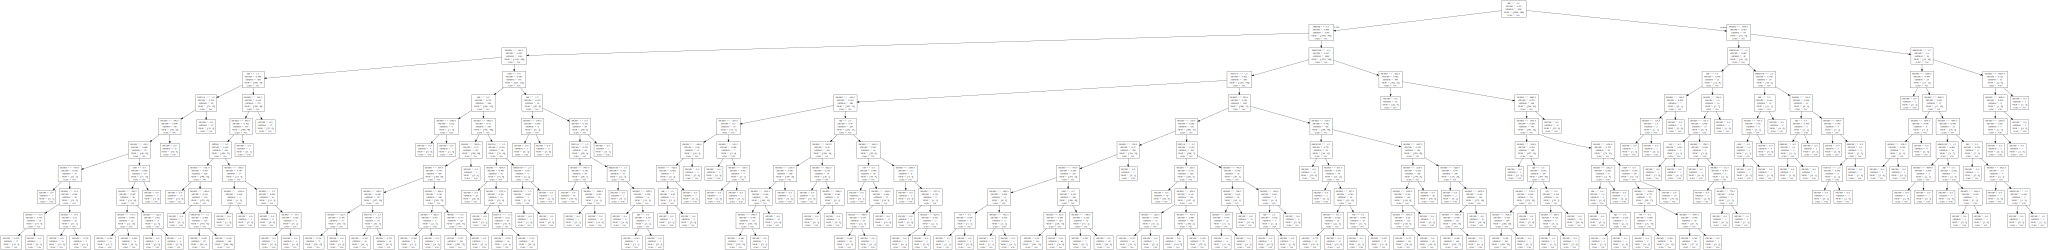

In [9]:
from sklearn import tree
from graphviz import Source
Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) 

In [10]:
from sklearn.decomposition import PCA

x = x.to_numpy()

In [11]:
def generate_newDf_with_PCA(num_cols, x):
    
    from sklearn.preprocessing import StandardScaler
    x = StandardScaler().fit_transform(x)
    
    pca = PCA(n_components = num_cols) 
    principalComponents = pca.fit_transform(x) 
    
    column_names = []
    for i in range(num_cols):
        name = 'pc ' + str(i)
        column_names.append(name)
    
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = column_names)
    principalDf.head()
    finalDf = pd.concat([principalDf, df[['y']]], axis = 1)
    finalDf.head(5)
    print(pca.explained_variance_ratio_)
    print(pca.explained_variance_ratio_.sum())
    return finalDf

finalDf = generate_newDf_with_PCA(4, x)

[0.20138465 0.15586271 0.13344624 0.12199225]
0.6126858457498996


In [12]:
print(finalDf.columns)
finalDf = finalDf.dropna()
x = finalDf.loc[:, finalDf.columns != 'y']
y = finalDf['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)
dt, y_hat, accuracy = decTreeAndAccuracy(maxDepth = None)


Index(['pc 0', 'pc 1', 'pc 2', 'pc 3', 'y'], dtype='object')
time taken 0.04886817932128906
[0. 0. 0. ... 1. 0. 0.]
y_hat: [0. 0. 0. ... 1. 0. 0.]
accuracy: 0.7848101265822784


In [13]:
print(x)
print(y)
print(dt)
score, mean_score = generate_cross_val(dt, x, y, k_fold)
print(score, mean_score)

#accuracy improved from 

          pc 0      pc 1      pc 2      pc 3
0     1.325828  1.055645 -0.816110 -2.355560
1    -0.373035 -1.013414  0.117927  1.404115
2    -1.786538  0.632143  0.159217 -0.090444
3    -1.574018 -0.988630 -0.581962  1.692238
4     0.684018 -0.696565  0.792696 -0.160127
...        ...       ...       ...       ...
4306 -0.548293 -0.732163  0.641427 -0.502053
4307  0.067549 -3.883041 -5.420394  0.980992
4308  1.215579  0.309328 -0.175250  0.143803
4309 -0.593000  0.461530 -0.259215 -0.214204
4310 -1.158732 -0.474627 -0.874948  1.351400

[4108 rows x 4 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4306    0.0
4307    0.0
4308    0.0
4309    0.0
4310    0.0
Name: y, Length: 4108, dtype: float64
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samp

In [14]:
decTreeAndAccuracy(maxDepth = 10, crit = 'entropy')

time taken 0.03989219665527344
[0. 0. 0. ... 0. 0. 0.]
y_hat: [0. 0. 0. ... 0. 0. 0.]
accuracy: 0.8695228821811101


(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=42, splitter='best'),
 array([0., 0., 0., ..., 0., 0., 0.]),
 0.8695228821811101)

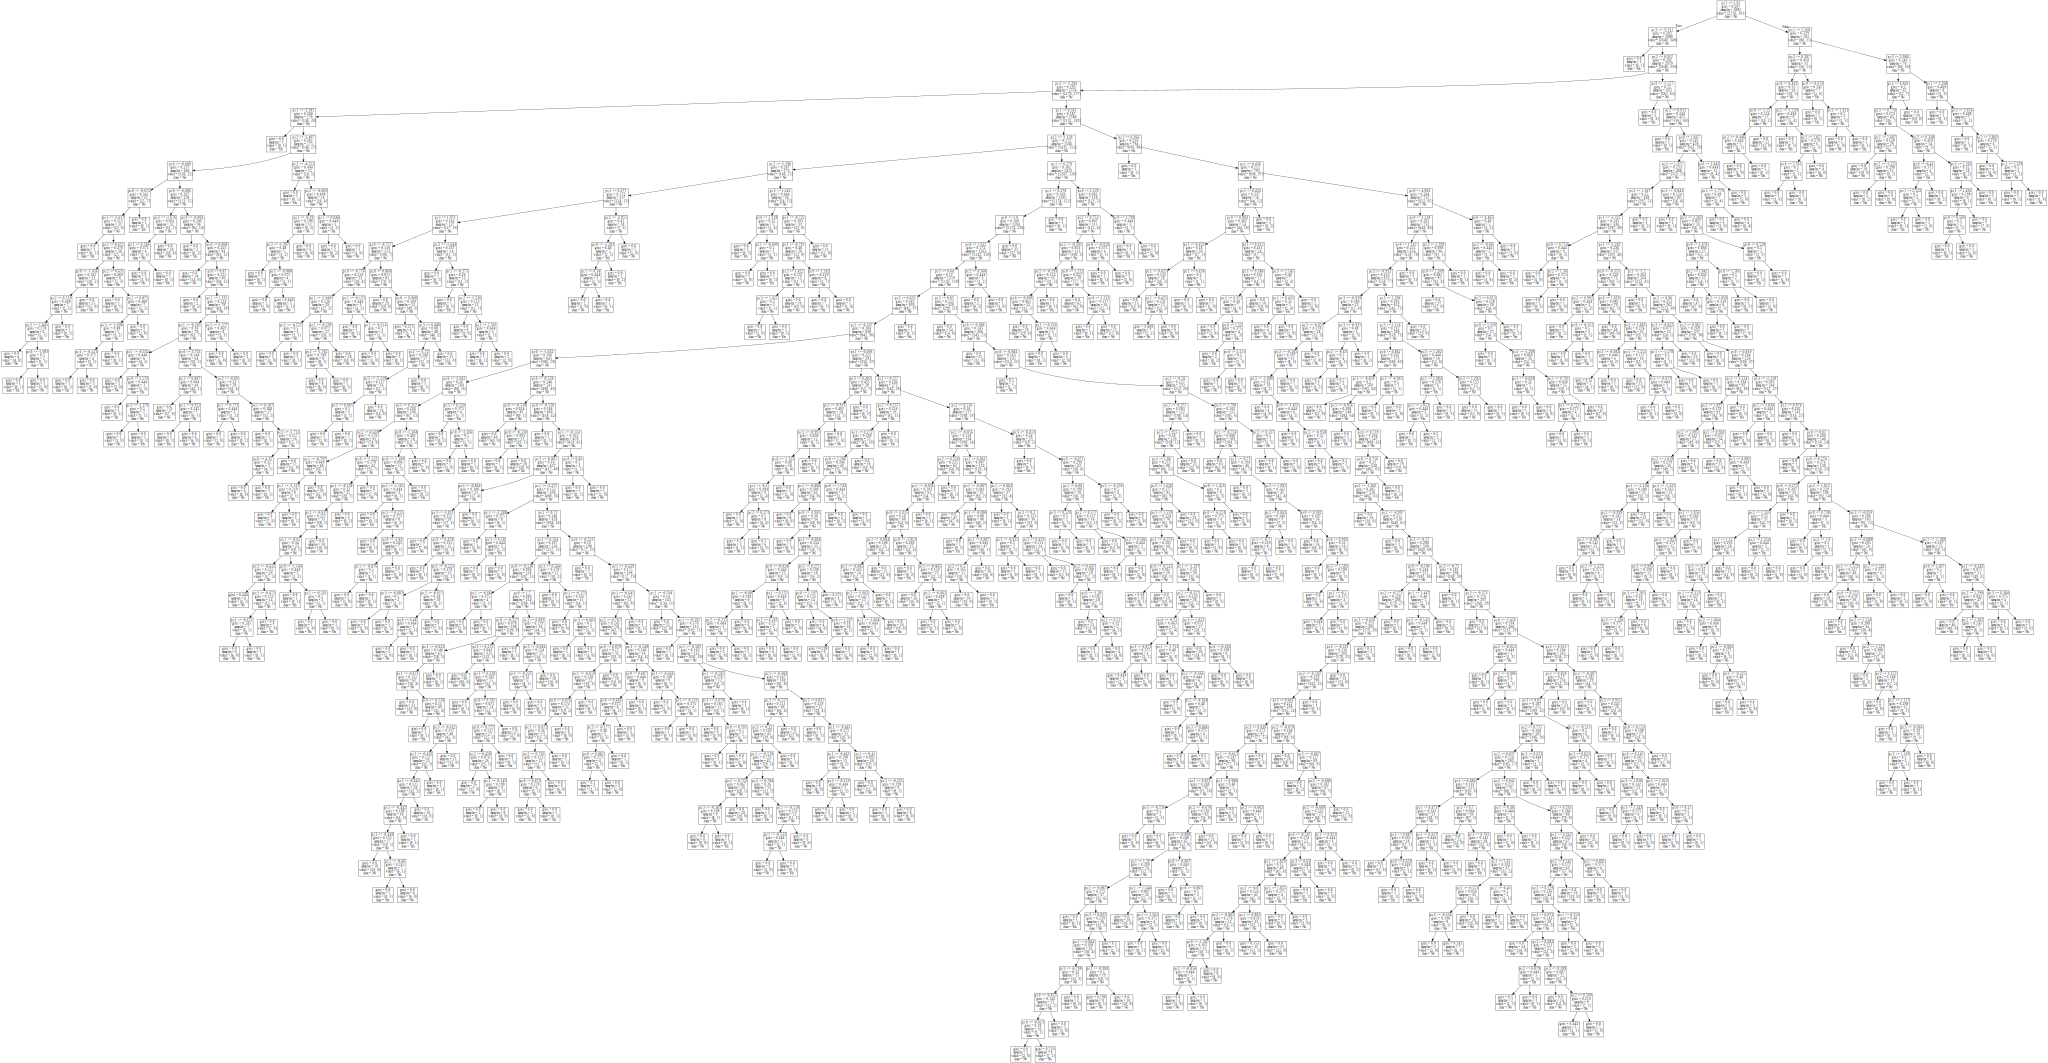

In [15]:
Source(tree.export_graphviz(dt, out_file=None, class_names=['No', 'Yes'], feature_names= x_train.columns)) 